# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# get data
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
#print log
print("Beginning Data Retrival")
print("************************")
set_ct = 1
record_ct = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],
                "Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record_ct <= 50:
            print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
            record_ct += 1 
        else:
            record_ct = 0
            set_ct += 1
            print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
            record_ct += 1
    else:
        print("City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...")
print("************************")
print("Data Retrieval Complete. You are just and fair, and we will return with a shrubbery. Please continue forward")
print("************************")

Beginning Data Retrival
************************
Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | davila
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | maldonado
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | tomatlan
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | saint pete beach
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | luang prabang
Processing Record 21 of Set 1 | ca

Processing Record 10 of Set 4 | chokurdakh
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 11 of Set 4 | kavaratti
Processing Record 12 of Set 4 | nemuro
Processing Record 13 of Set 4 | oberwart
Processing Record 14 of Set 4 | albrechtice
Processing Record 15 of Set 4 | richards bay
Processing Record 16 of Set 4 | the valley
Processing Record 17 of Set 4 | pushkinskiye gory
Processing Record 18 of Set 4 | mar del plata
Processing Record 19 of Set 4 | auki
Processing Record 20 of Set 4 | nikolskoye
Processing Record 21 of Set 4 | maloy
Processing Record 22 of Set 4 | cockburn town
Processing Record 23 of Set 4 | oildale
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 24 of Set 4 | axim
Processing Record 25 of Set 4 | yichang
Processing Record 26 of Set 4 | mardin
Processing Record 27 of Set 4 | la palma
Processing Record 28 of Set 4 | namibe
Processing Record 29 of Set 4 |

Processing Record 25 of Set 7 | hede
Processing Record 26 of Set 7 | jacareacanga
Processing Record 27 of Set 7 | bull savanna
Processing Record 28 of Set 7 | chadiza
Processing Record 29 of Set 7 | kargasok
Processing Record 30 of Set 7 | paranaiba
Processing Record 31 of Set 7 | vaniyambadi
Processing Record 32 of Set 7 | northam
Processing Record 33 of Set 7 | ostrogozhsk
Processing Record 34 of Set 7 | matagami
Processing Record 35 of Set 7 | garoua boulai
Processing Record 36 of Set 7 | wolverhampton
Processing Record 37 of Set 7 | nata
Processing Record 38 of Set 7 | san rafael
Processing Record 39 of Set 7 | lethem
Processing Record 40 of Set 7 | wolfsburg
Processing Record 41 of Set 7 | flinders
Processing Record 42 of Set 7 | umea
Processing Record 43 of Set 7 | mandurah
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 44 of Set 7 | znamenskoye
Processing Record 45 of Set 7 | likasi
Processing Record 46 of Set 7 | solnec

Processing Record 39 of Set 10 | ekibastuz
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 40 of Set 10 | nueva granada
Processing Record 41 of Set 10 | viedma
Processing Record 42 of Set 10 | sharjah
Processing Record 43 of Set 10 | port alberni
Processing Record 44 of Set 10 | flin flon
Processing Record 45 of Set 10 | nisia floresta
Processing Record 46 of Set 10 | manoel urbano
Processing Record 47 of Set 10 | sambava
Processing Record 48 of Set 10 | barpathar
Processing Record 49 of Set 10 | nelson bay
Processing Record 50 of Set 10 | vestmannaeyjar
Processing Record 0 of Set 11 | vestmanna
Processing Record 1 of Set 11 | mariental
Processing Record 2 of Set 11 | christchurch
Processing Record 3 of Set 11 | ribas do rio pardo
Processing Record 4 of Set 11 | huaiyuan
Processing Record 5 of Set 11 | bontang
Processing Record 6 of Set 11 | nueve de julio
Processing Record 7 of Set 11 | gazojak
Processing Record 8 of Set 11 | d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create then display dataframe
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vila velha,40,BR,1553279873,66,-3.71,-38.60,86.00,12.75
1,ushuaia,75,AR,1553277600,93,-54.81,-68.31,46.40,6.93
2,busselton,32,AU,1553280016,55,-33.64,115.35,53.01,18.81
3,hithadhoo,88,MV,1553280172,100,-0.60,73.08,85.84,5.95
4,saldanha,0,PT,1553280172,27,41.42,-6.55,61.00,2.59


In [6]:
#export to csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

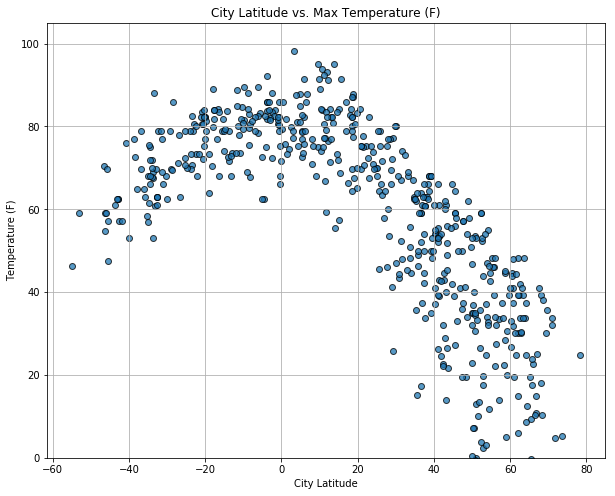

In [11]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

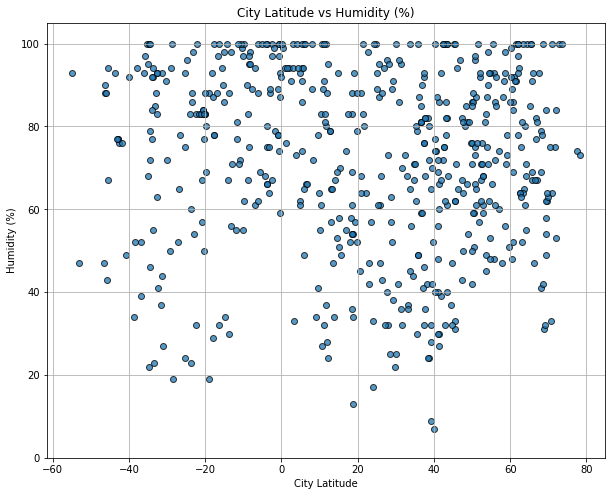

In [8]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Hmdty.png")
plt.show()

#### Latitude vs. Cloudiness Plot

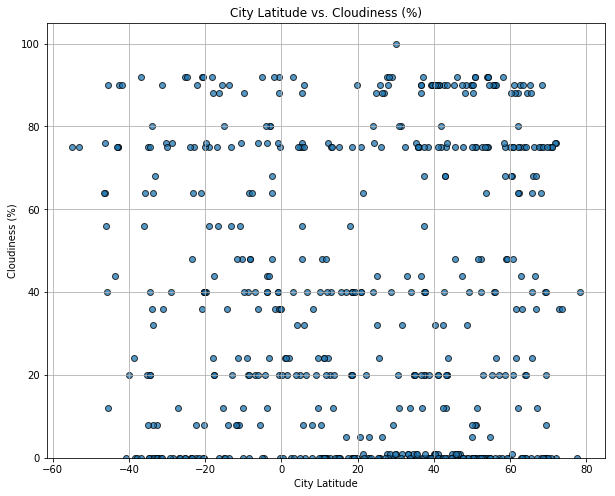

In [9]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,105)
plt.grid(True)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Cld.png")
plt.show()

#### Latitude vs. Wind Speed Plot

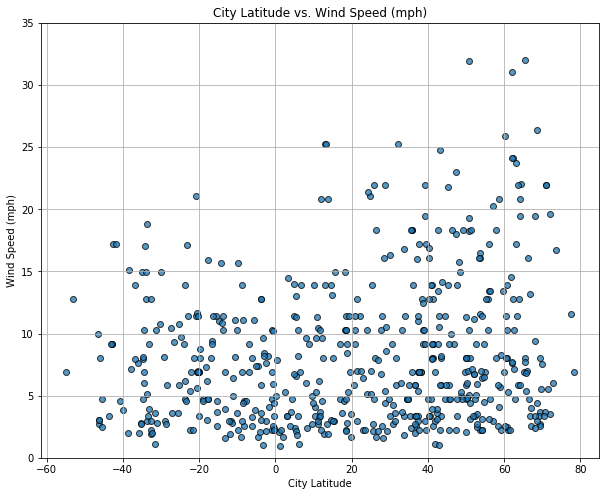

In [10]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,35)
plt.grid(True)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_WndSpd.png")
plt.show()